- detect.py를 이용해서 코드를 작성

In [2]:
import tensorflow as tf
#2-6번라인 지웠음~!
import core.utils as utils
from core.yolov4 import filter_boxes

from PIL import Image
import cv2
import numpy as np
import os


In [6]:
# 필요한 변수 선언
IMG_SIZE = 416
MODEL_PATH ='./checkpoints/yolov4-416' #변환한 saved model 경로
OUTPUT_PATH ='./predict_result' #변환  결과 이미지 저장할 경로
if os.path.isdir(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)
    
# NMS 사용할 Treshold
IOU_THRESH = 0.5
CONFIDENCE_SCORE_THRESH = 0.3

In [8]:
#추론할 이미지 로딩
IMAGE_PATH ='./data/kite.jpg'

ori_image = cv2.imread(IMAGE_PATH)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

# 전처리 - resize, 정규화, BATCH 더미 추가
image_data = cv2.resize(ori_image,(IMG_SIZE,IMG_SIZE))
image_data= image_data/255. # 정규화
image_data = image_data.astype(np.float32)
print(image_data.shape)
image_data = image_data[np.newaxis, ...] # 추론할대는 배치 축이 하나 필요하니까 축을 늘림
print(image_data.shape)

(416, 416, 3)
(1, 416, 416, 3)


In [12]:
# 모델 loading
model = tf.keras.models.load_model(MODEL_PATH)

In [15]:
# image_data = ndarray -> Tensor 타입으로 변환 후에 추론
input_tensor = tf.convert_to_tensor(image_data)

In [16]:
#추론 
pred = model.predict(input_tensor)

In [17]:
print(type(pred),pred.shape)

<class 'numpy.ndarray'> (1, 45, 84)


In [19]:
boxes = pred[:,:,0:4]  # bound box에대한 예측결과
pred_conf = pred[:,:,4:] # class별 예측 확률 confidence  
print(boxes.shape, pred_conf.shape)

(1, 45, 4) (1, 45, 80)


In [20]:
 tf.reshape(boxes, (tf.shape(boxes)[0], -1, 1, 4)).shape

TensorShape([1, 45, 1, 4])

In [21]:
tf.reshape(pred_conf, (tf.shape(pred_conf)[0], -1, tf.shape(pred_conf)[-1])).shape


TensorShape([1, 45, 80])

In [22]:
# NMS 진행 Non Maximum
boxes, scores, classes, valid_detections = tf.image.combined_non_max_suppression(
    boxes = tf.reshape(boxes, (tf.shape(boxes)[0], -1, 1, 4)),
    scores = tf.reshape(pred_conf, (tf.shape(pred_conf)[0], -1, tf.shape(pred_conf)[-1])),
    max_output_size_per_class = 50,
    max_total_size= 50,
    iou_threshold = IOU_THRESH,
    score_threshold= CONFIDENCE_SCORE_THRESH
    
)

In [23]:
# boxes : bounding box좌표->nms 지나온,
#scores : box들 물체들의 확률,#
#classes : box물체의 클라스 , 
# valid_detections : NMS 통과한 bounding box(물체)의 개수 

In [24]:
valid_detections, boxes.shape

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([17])>,
 TensorShape([1, 50, 4]))

In [26]:
pred_bbox =[boxes.numpy(), scores.numpy(), classes.numpy(), valid_detections.numpy()]
result_image = utils.draw_bbox(ori_image,pred_bbox) # 유틸스에 있는 draw_bbox를 불러와 실행하는 것.. 폴더 찾아가서 보기

In [27]:
type(result_image), result_image.dtype

(numpy.ndarray, dtype('uint8'))

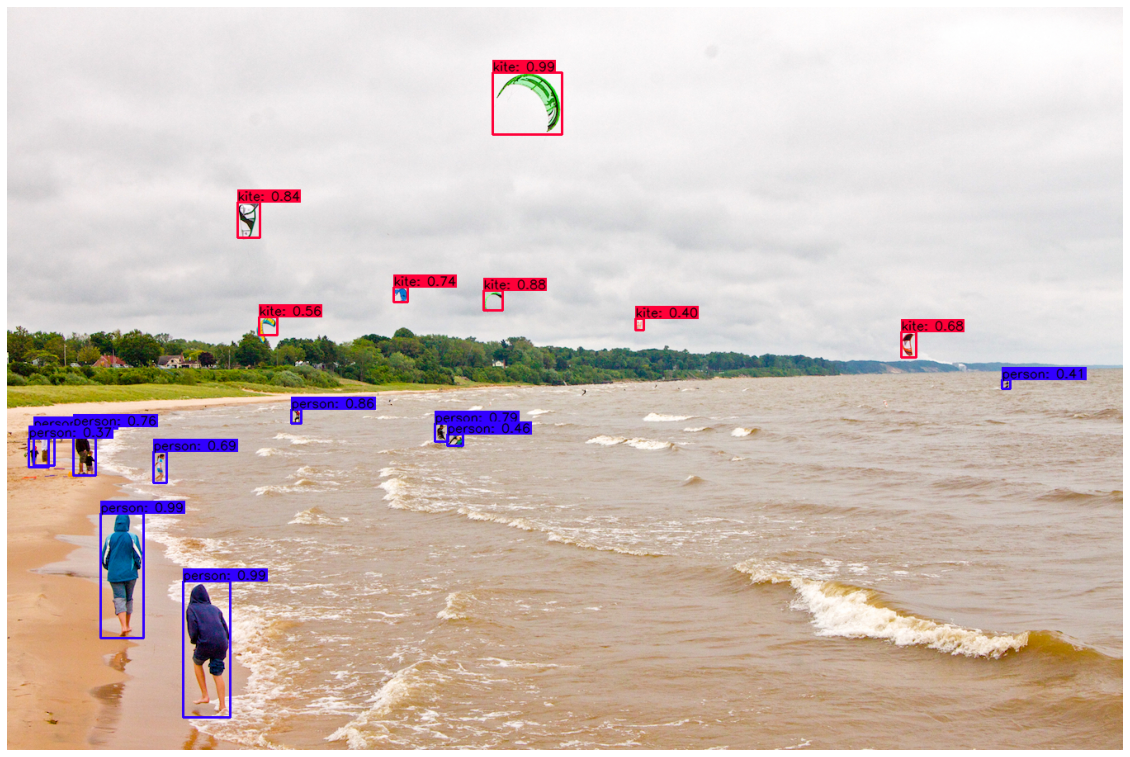

In [28]:
#coco dataset 으로 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(result_image)
plt.axis('off')
plt.show() # 6교시

# Lion/Tiger wieght를 사용
1. obj.name파일을 생성
    - class명을 작성한 파일
2. 1의 obj.names파일을 core/config.py 에 등록 -> core/config.py파일을 찾아서 만든 파일 경로 yolo 옵션에다가 욜로 classes에 넣어줌 
3. yolo 모델을 tf keras 모델로 변환.

In [3]:
#data/classes/obj.names 파일 만들기 --> 직접 텍스트파일로 만들엇음  / 코랩에서는 코드로 만들었음.. 
# 필요한 변수 선언
IMG_SIZE = 416
MODEL_PATH ='./checkpoints/yolov4-lt/' #변환한 saved model 경로
OUTPUT_PATH ='./predict_result' #변환  결과 이미지 저장할 경로
if os.path.isdir(OUTPUT_PATH):
    os.mkdir(OUTPUT_PATH)
    
# NMS 사용할 Treshold
IOU_THRESH = 0.5
CONFIDENCE_SCORE_THRESH = 0.3

In [4]:
#추론할 이미지 로딩
# IMAGE_PATH ='./data/lion.jpg'
IMAGE_PATH ='./data/tiger.jpg'

ori_image = cv2.imread(IMAGE_PATH)
ori_image = cv2.cvtColor(ori_image, cv2.COLOR_BGR2RGB)

# 전처리 - resize, 정규화, BATCH 더미 추가
image_data = cv2.resize(ori_image,(IMG_SIZE,IMG_SIZE))
image_data= image_data/255. # 정규화
image_data = image_data.astype(np.float32)
print(image_data.shape)
image_data = image_data[np.newaxis, ...] # 추론할대는 배치 축이 하나 필요하니까 축을 늘림
print(image_data.shape)

(416, 416, 3)
(1, 416, 416, 3)


In [5]:
# 모델 loading  -> 가져온 모델사용하면 됨

model2 = tf.keras.models.load_model(MODEL_PATH)

In [6]:
# image_data = ndarray -> Tensor 타입으로 변환 후에 추론
input_tensor = tf.convert_to_tensor(image_data)

In [8]:
#추론 
pred = model2.predict(input_tensor)

In [9]:
boxes = pred[:,:,0:4]  # bound box에대한 예측결과
pred_conf = pred[:,:,4:] # class별 예측 확률 confidence  
print(boxes.shape, pred_conf.shape)

(1, 10, 4) (1, 10, 2)


In [10]:
# NMS 진행 Non Maximum
boxes, scores, classes, valid_detections = tf.image.combined_non_max_suppression(
    boxes = tf.reshape(boxes, (tf.shape(boxes)[0], -1, 1, 4)),
    scores = tf.reshape(pred_conf, (tf.shape(pred_conf)[0], -1, tf.shape(pred_conf)[-1])),
    max_output_size_per_class = 50,
    max_total_size= 50,
    iou_threshold = IOU_THRESH,
    score_threshold= CONFIDENCE_SCORE_THRESH)

In [ ]:
for i in range(vaid_detections.numpy()[0]):
    print(scores.numpy()[0][i])
    print(classes.numpy()[0][i])   #마지막 교시.. 

In [11]:
pred_bbox =[boxes.numpy(), scores.numpy(), classes.numpy(), valid_detections.numpy()]
result_image = utils.draw_bbox(ori_image,pred_bbox) # 유틸스에 있는 draw_bbox를 불러와 실행하는 것.. 폴더 찾아가서 보기

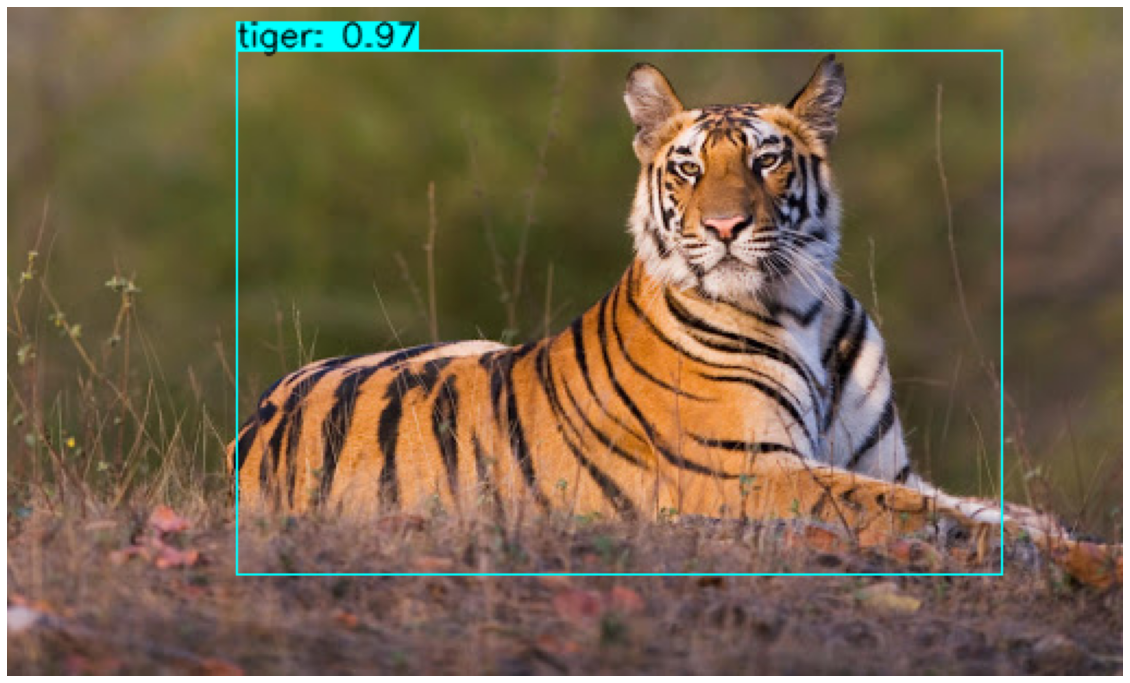

In [12]:
#coco dataset 으로 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(result_image)
plt.axis('off')
plt.show() # 6교시